<a href="https://colab.research.google.com/github/Data-Intelligence-Mastery/data_science_interview_questions/blob/master/Q005_plot_revenue_by_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Given the following data set, can you plot a chart that shows the percent of revenue by marketing source?

Data link [here](https://raw.githubusercontent.com/Data-Intelligence-Mastery/data_science_interview_questions/master/data/Sales%20data.csv)

You can assume that purchase_value is revenue in this case, and you'll have to calculate the percent of revenue by source prior to plotting.

First let's examine the dataset.

In [33]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/Data-Intelligence-Mastery/data_science_interview_questions/master/data/Sales%20data.csv'
df = pd.read_csv(url)

df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address
0,22058,2015-02-24 22:55:49,2015-04-18 2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08
1,333320,2015-06-07 20:39:50,2015-06-08 1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09
4,221365,2015-07-21 7:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08


Now let's group by the 'source' and calculate the sum of every column.

In [39]:
df_grouped = wb.groupby('source').sum()
df_grouped


,user_id,purchase_value,age,ip_address
source,,,,
Ads,11986302986,2211133,1984087,1.285529e+14
Direct,6129751994,1130971,1016476,6.641500e+13
SEO,12132191363,2239274,2007395,1.302471e+14


Now let's calculate the percentage of revenue (purchase value) by market source.

In [43]:
df_grouped['revenue_by_src'] = df_grouped['purchase_value']/df_grouped['purchase_value'].sum()
df_grouped['revenue_by_src_%'] = pd.Series(["{0:.1%}".format(x) for x in df_grouped['revenue_by_src']],index=df_grouped.index)
df_grouped[['revenue_by_src_%']]

,revenue_by_src_%
source,
Ads,39.6%
Direct,20.3%
SEO,40.1%


Based on the dataset, pie chart seems a good option to visualize the data.

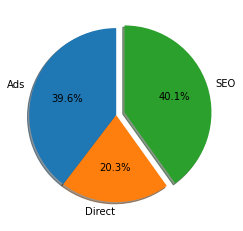

In [67]:
import matplotlib.pyplot as plt

data = df_grouped['revenue_by_src'].astype(np.float32)
labels = list(df_grouped.index)
fig, ax = plt.subplots()
ax.pie(data, explode=[0, 0, 0.1],labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()